In [1]:
import pandas as pd
import nltk

In [2]:
sentiment_data = pd.read_csv('/content/drive/MyDrive/Tweets.csv')

In [3]:
sentiment_data.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [29]:
sentiment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [4]:
sentiment_data.shape

(14640, 15)

In [5]:
sentiment_df = sentiment_data.drop(sentiment_data[sentiment_data['airline_sentiment_confidence']<0.5].index, axis= 0)

In [6]:
sentiment_df.shape

(14404, 15)

<Axes: xlabel='airline_sentiment', ylabel='count'>

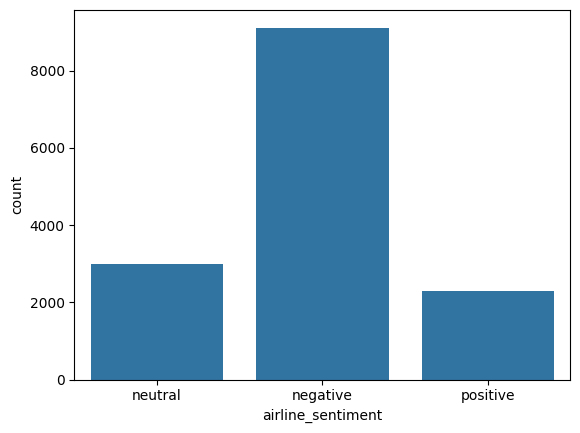

In [30]:
sns.countplot(x='airline_sentiment', data=sentiment_df)

<Axes: xlabel='airline_sentiment', ylabel='airline_sentiment_confidence'>

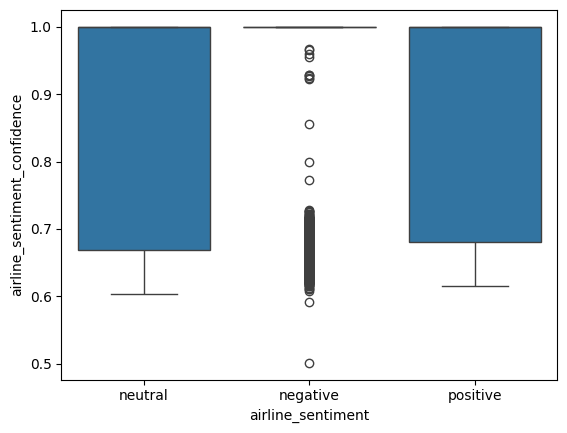

In [31]:
sns.boxplot(x='airline_sentiment', y='airline_sentiment_confidence', data=sentiment_df)

<ipython-input-36-057e9809a624>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sentiment_df['airline_sentiment_confidence'])


<Axes: xlabel='airline_sentiment_confidence', ylabel='Density'>

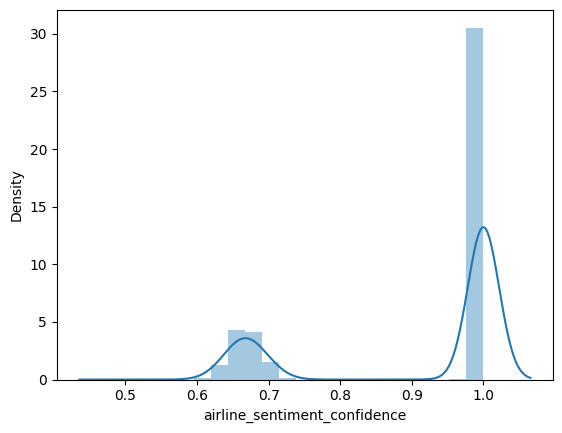

In [36]:
sns.distplot(sentiment_df['airline_sentiment_confidence'])

In [7]:
X = sentiment_df['text']
Y = sentiment_df['airline_sentiment']

In [8]:
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
stop_words = stopwords.words('english')
punctuations = string.punctuation

In [10]:
import re
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
clean_data = []
for i in range(len(X)):
  text = re.sub('[^a-zA-Z]', ' ',X.iloc[i])
  text = text.lower().split()
  text = [lemmatizer.lemmatize(word) for word in text if (word not in stop_words) and (word not in punctuations)]
  text = ' '.join(text)
  clean_data.append(text)


In [13]:
clean_data

['virginamerica dhepburn said',
 'virginamerica today must mean need take another trip',
 'virginamerica really aggressive blast obnoxious entertainment guest face amp little recourse',
 'virginamerica really big bad thing',
 'virginamerica seriously would pay flight seat playing really bad thing flying va',
 'virginamerica yes nearly every time fly vx ear worm go away',
 'virginamerica really missed prime opportunity men without hat parody http co mwpg grezp',
 'virginamerica well',
 'virginamerica amazing arrived hour early good',
 'virginamerica know suicide second leading cause death among teen',
 'virginamerica lt pretty graphic much better minimal iconography',
 'virginamerica great deal already thinking nd trip australia amp even gone st trip yet p',
 'virginamerica virginmedia flying fabulous seductive sky u take stress away travel http co ahlxhhkiyn',
 'virginamerica thanks',
 'virginamerica sfo pdx schedule still mia',
 'virginamerica excited first cross country flight lax mc

In [14]:
Y

,airline_sentiment
0,neutral
2,neutral
3,negative
4,negative
5,negative
...,...
14634,negative
14636,negative
14637,neutral
14638,negative


In [17]:
# defining Sentiments:

sentiments = ['negative' , 'neutral', 'positive']
Y = Y.apply(lambda x: sentiments.index(x))
#Lets check Y that it has correctly changed or not:
Y.head()

,airline_sentiment
0,1
2,1
3,0
4,0
5,0


In [18]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features = 5000, stop_words = ['virginamerica','united'])
X_fit = count_vectorizer.fit_transform(clean_data).toarray()

X_fit.shape

(14404, 5000)

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
model = MultinomialNB()

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X_fit,Y, test_size = 0.3)

In [21]:
model.fit(X_train,Y_train)

MultinomialNB()

In [22]:
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report

classification = classification_report(Y_test,y_pred)
print(classification)

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      2755
           1       0.61      0.46      0.52       888
           2       0.71      0.64      0.67       679

    accuracy                           0.77      4322
   macro avg       0.71      0.67      0.68      4322
weighted avg       0.75      0.77      0.76      4322



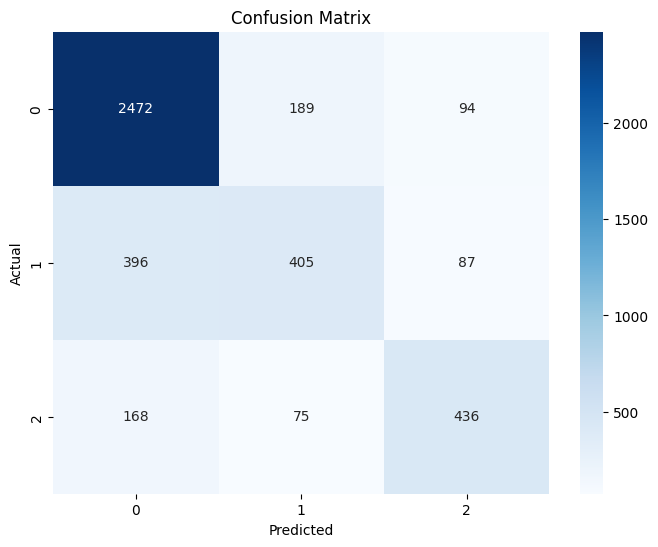

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already trained your model and have y_pred (predicted labels)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)

# Create a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()